In [5]:
import pandas as pd
import numpy as np
import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 

import decimal
import os
import sys

# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(ZRAZKY_SK_DIR + 'zrazky_sk.parquet'   )

# print(df.info())

dectype = pa.decimal128(5, 2)
df = df.rename(columns={'Zrážky 24h': 'Zr24h', 'Zrážky 12h': 'Zr12h', 'Zrážky 1h': 'Zr1h',  'Zrážky 6h': 'Zr6h', 'Zrážky 3h': 'Zr3h'})
print(df.memory_usage(deep=True, index=True).sum())

# df['Zr1h'] = df['Zr1h'].astype(pd.ArrowDtype (dectype))
# df['Zr3h'] = df['Zr3h'].astype(pd.ArrowDtype (dectype))
# df['Zr6h'] = df['Zr6h'].astype(pd.ArrowDtype (dectype))
# df['Zr12h'] = df['Zr12h'].astype(pd.ArrowDtype (dectype))
# df['Zr24h'] = df['Zr24h'].astype(pd.ArrowDtype (dectype))
print(df.memory_usage(deep=True, index=True).sum())

# print(df.head())

25730880
25730880


                             Cas_CET      Zr1h     Zr24h
count                           1487    1487.0    1487.0
mean   2025-09-09 12:42:43.819771136  0.089307  2.132751
min              2025-08-08 09:00:00       0.0       0.0
25%              2025-08-24 23:30:00       0.0       0.0
50%              2025-09-09 12:00:00       0.0       0.0
75%              2025-09-25 01:30:00       0.0       0.8
max              2025-10-10 20:00:00       8.7      28.1
std                              NaN  0.516993  5.532187


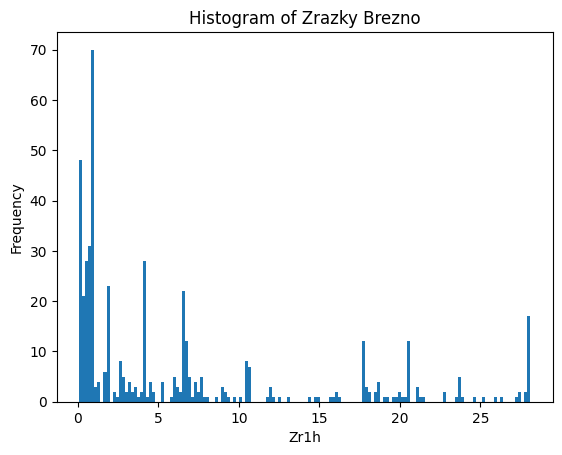

In [2]:
#BREZNO
dfbr = df[df.Stanica == 'Brezno']
print(dfbr.describe())
import matplotlib.pyplot as plt
# plt.hist(dfbr['Zrážky 12h'].__pow__(.1), bins=150)
plt.hist(dfbr.loc[dfbr['Zr24h']>0,['Zr24h']], bins=150)
plt.xlabel('Zr1h')
plt.ylabel('Frequency')
plt.title('Histogram of Zrazky Brezno')
plt.show()


In [ ]:
# sns.swarmplot(x=dfbr['Zrážky 12h']).head(1000)
# plt.show()

In [3]:
result = dfbr.sort_values(by='Cas_CET').copy()
result['rolsum'] = result['Zr1h'].rolling(window=24).sum()
result['diff'] = result['Zr24h'] - result.rolsum



In [4]:
f = pd.read_parquet(ZRAZKY_SK_DIR + 'zrazky_sk.parquet'   )
# make daily averages
# whole dataframe SK - not grouped by station
df_agg = df.copy()
df_agg = df_agg.set_index('Cas_CET').resample('D')['Zr1h'].agg(['sum', 'mean', 'max'])
df_agg = df_agg.reset_index()
print(df_agg.head())

       index  sum  mean   max
0 2025-08-08  NaN   NaN   1.5
1 2025-08-09  0.0  <NA>  <NA>
2 2025-08-10  NaN   NaN  20.2
3 2025-08-11  NaN   NaN   0.4
4 2025-08-12  NaN   NaN   0.3
